# 201644004_김산 딥러닝 프로젝트 텐서웨더, 교통사고

In [1]:
import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        # Currently, memory growth needs to be the same across GPUs
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        # Memory growth must be set before GPUs have been initialized
        print(e)
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras import optimizers
from keras.models import load_model
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn
from sklearn.preprocessing import *

1 Physical GPUs, 1 Logical GPUs


In [2]:
def min_max_normalize(lst):
    normalized = []
    
    for value in lst:
        normalized_num = (value - min(int(lst))) / (max(int(lst)) - min(int(lst)))
        normalized.append(normalized_num)
    
    return normalized

In [2]:
path = 'C:\TensorWeather\TW_accident2.csv'
data = pd.read_csv(path)
#ss_data=StandardScaler().fit_transform(data)
print(data.columns)

Index(['year', 'avgTemp', 'minTemp', 'maxTemp', 'rainFall', 'accident',
       'dead'],
      dtype='object')


In [34]:
#inpu = MinMaxScaler().fit_transform(data[['avgTemp', 'minTemp', 'maxTemp', 'rainFall']])
#oup = MinMaxScaler().fit_transform(data[['accident', 'dead']])
inpu = data[['avgTemp', 'minTemp', 'maxTemp', 'rainFall']]
oup_acc = data[['accident']]
oup_dead = data[['dead']]
oup = data[['accident', 'dead']]
print(inpu.shape, oup_acc.shape,oup_dead.shape)

(1826, 4) (1826, 1) (1826, 1)


In [54]:
sgd = optimizers.SGD(lr=0.001, decay=1e-6, momentum=0.9, nesterov=True)

In [54]:
X = tf.keras.layers.Input(shape=[4])
Y = tf.keras.layers.Dense(20,activation='relu')(X)
Y = tf.keras.layers.Dense(15,activation='relu')(Y)
Y = tf.keras.layers.Dense(2,activation='relu')(Y)
model = tf.keras.models.Model(X, Y)
model.compile(loss='mean_squared_logarithmic_error',
    metrics=['accuracy'])
model.summary()

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 4)]               0         
_________________________________________________________________
dense_3 (Dense)              (None, 20)                100       
_________________________________________________________________
dense_4 (Dense)              (None, 15)                315       
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 32        
Total params: 447
Trainable params: 447
Non-trainable params: 0
_________________________________________________________________


In [55]:
model.fit(inpu, oup, epochs=100, verbose=1)

Epoch 1/100
58/58 [==============================] - 0s 2ms/step - loss: 10.6857 - accuracy: 0.5838
Epoch 2/100
58/58 [==============================] - 0s 2ms/step - loss: 6.1462 - accuracy: 0.9885
Epoch 3/100
58/58 [==============================] - 0s 2ms/step - loss: 4.0942 - accuracy: 1.0000
Epoch 4/100
58/58 [==============================] - 0s 2ms/step - loss: 2.8312 - accuracy: 1.0000
Epoch 5/100
58/58 [==============================] - 0s 2ms/step - loss: 1.9610 - accuracy: 1.0000
Epoch 6/100
58/58 [==============================] - 0s 2ms/step - loss: 1.3650 - accuracy: 1.0000
Epoch 7/100
58/58 [==============================] - 0s 2ms/step - loss: 0.9687 - accuracy: 1.0000
Epoch 8/100
58/58 [==============================] - 0s 2ms/step - loss: 0.7028 - accuracy: 1.0000
Epoch 9/100
58/58 [==============================] - 0s 2ms/step - loss: 0.5236 - accuracy: 1.0000
Epoch 10/100
58/58 [==============================] - 0s 2ms/step - loss: 0.4036 - accuracy: 1.0000
Epoch 11

In [53]:
model.save('C:\TensorWeather\\TW_accident.h5')

In [32]:
model = load_model('C:\TensorWeather\\TW_accident.h5')

In [36]:
model.predict(inpu[0:1])

array([[459.2413   ,   6.8050046]], dtype=float32)

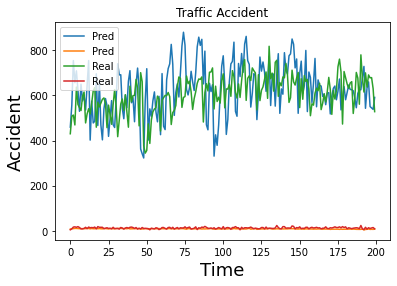

In [47]:
plt.plot(model.predict(inpu[0:200]), label = "Pred")
plt.plot(oup[0:200], label = "Real")
plt.title("Traffic Accident")
plt.xlabel('Time',fontsize=18)
plt.ylabel('Accident',fontsize=18)
plt.legend()
plt.show()

In [26]:
test[0][0]

563.7297

In [61]:
oup[0:11], inpu[0:11]

(    accident  dead
 0        430     4
 1        508     8
 2        513    16
 3        469    17
 4        637    15
 5        560    18
 6        547    14
 7        533     8
 8        596     8
 9        615    10
 10       478    15,
     avgTemp  minTemp  maxTemp  rainFall
 0      -4.9     -7.4     -1.9       0.5
 1      -3.8     -7.6      0.8       0.3
 2      -2.3     -9.3      4.3       0.0
 3       2.4     -2.6      9.8       0.0
 4       3.8     -2.7     10.1       4.1
 5       1.8     -3.3      7.1       4.7
 6      -3.0     -6.5      1.6       0.0
 7      -2.5     -7.8      3.3       0.0
 8      -0.2     -5.1      4.9       0.0
 9       1.0     -4.2      6.7       0.0
 10      1.0     -3.3      6.0       0.1)

In [62]:
#가중치 확인
model.get_weights()

[array([[-0.29505503,  0.41499308,  0.5795151 ,  0.5349923 ,  0.04886641,
          0.06933938, -0.39491805,  0.02758169, -0.3070455 , -0.01279127,
          0.62697697,  0.76672816,  0.57966465,  0.71251285,  0.40659606,
          0.03517185,  0.54266715,  0.00822243, -0.4700883 , -0.66863215],
        [-1.045879  ,  0.502164  , -0.23560199, -0.34750253,  0.19453558,
          0.020242  , -0.5380779 , -0.5374877 , -1.069828  , -1.2285682 ,
          0.33851293,  0.50497013, -0.03460196, -0.45668212, -0.05405033,
         -0.97894263, -0.15198563, -0.5075526 , -0.56528735, -0.4527037 ],
        [ 0.89523476,  0.13872215,  0.63887596, -0.15998214, -0.510239  ,
         -0.11454341,  0.56757456,  0.79457843,  0.9600751 ,  0.48730215,
          0.41089928, -0.07570257,  0.11439729,  0.5757477 , -0.45635724,
          0.54736775,  0.07702803, -0.23766838,  0.41791633,  0.8263715 ],
        [ 0.14939032,  0.3077568 ,  0.42770386, -0.9811961 ,  0.08025413,
         -0.27178955,  0.1137118 , 